# IRIS FLOWER CLASSIFICATION

## 1. Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

About columns:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica

In [5]:

df.shape

(150, 5)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

INFERENCE: Dataset doesn't have any null value

<AxesSubplot:>

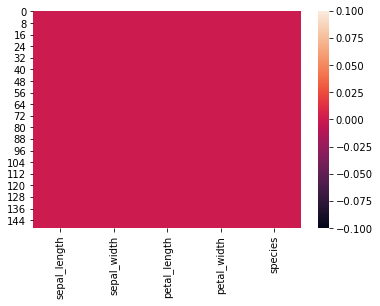

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
#the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2.Exploratory Data Analysis

In [10]:
 print(df['species'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


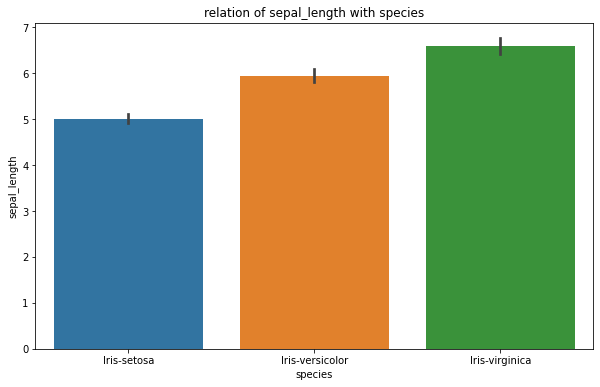

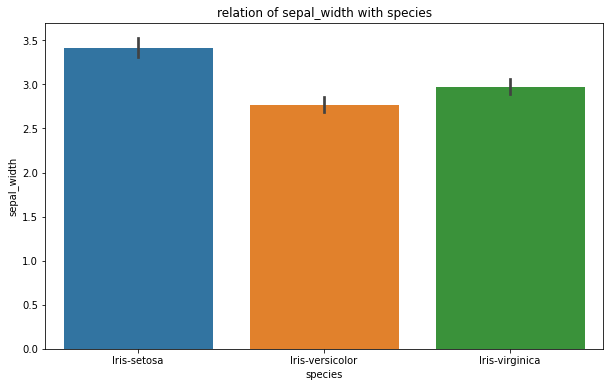

In [11]:

fig = plt.figure(figsize = (10,6))
sns.barplot(df['species'],df['sepal_length'], data = df)
plt.title('relation of sepal_length with species')
plt.xlabel('species')
plt.ylabel('sepal_length')
plt.show()
fig = plt.figure(figsize = (10,6))
sns.barplot(df['species'],df['sepal_width'], data = df)
plt.title('relation of sepal_width with species')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.show()



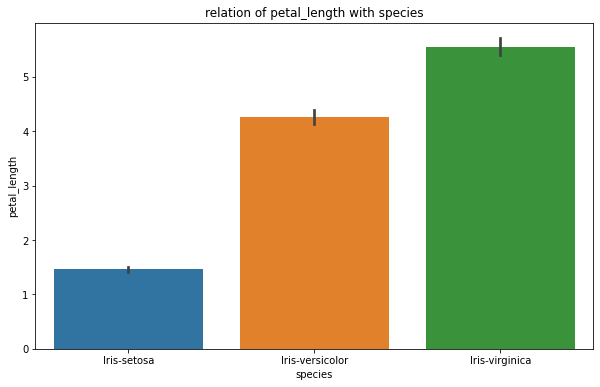

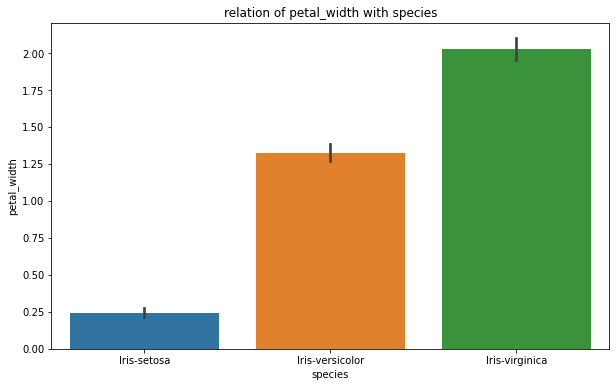

In [12]:

fig = plt.figure(figsize = (10,6))
sns.barplot(df['species'],df['petal_length'], data = df)
plt.title('relation of petal_length with species')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()
fig = plt.figure(figsize = (10,6))
sns.barplot(df['species'],df['petal_width'], data = df)
plt.title('relation of petal_width with species')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.show()

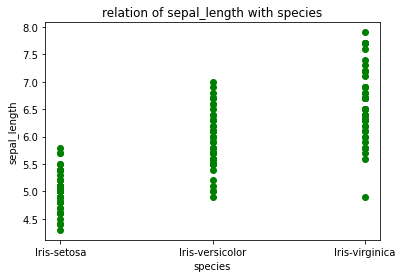

In [13]:
# checking the variation of sepal_length in the different species of Iris flower

plt.scatter(df['species'], df['sepal_length'], color = 'green')
plt.title('relation of sepal_length with species')
plt.xlabel('species')
plt.ylabel('sepal_length')
plt.show()

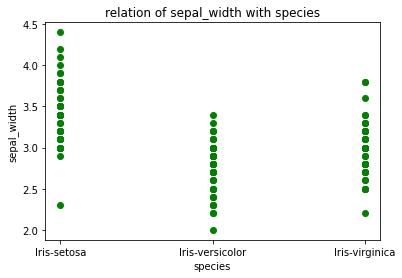

In [14]:
# checking the variation of sepal_width in the different species of Iris flower

plt.scatter(df['species'], df['sepal_width'], color = 'green')
plt.title('relation of sepal_width with species')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.show()

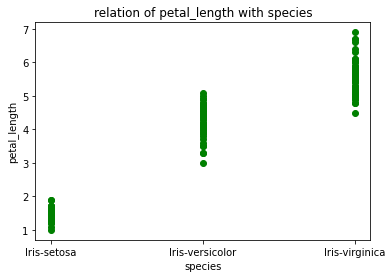

In [15]:
# checking the variation of sepal_length in the different species of Iris flower

plt.scatter(df['species'], df['petal_length'], color = 'green')
plt.title('relation of petal_length with species')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()

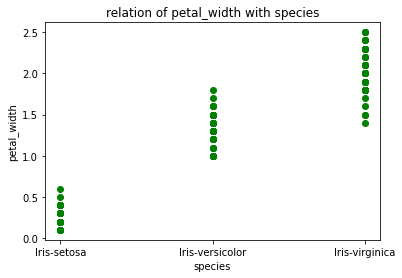

In [16]:
# checking the variation of sepal_length in the different species of Iris flower

plt.scatter(df['species'], df['petal_width'], color = 'green')
plt.title('relation of petal_width with species')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.show()

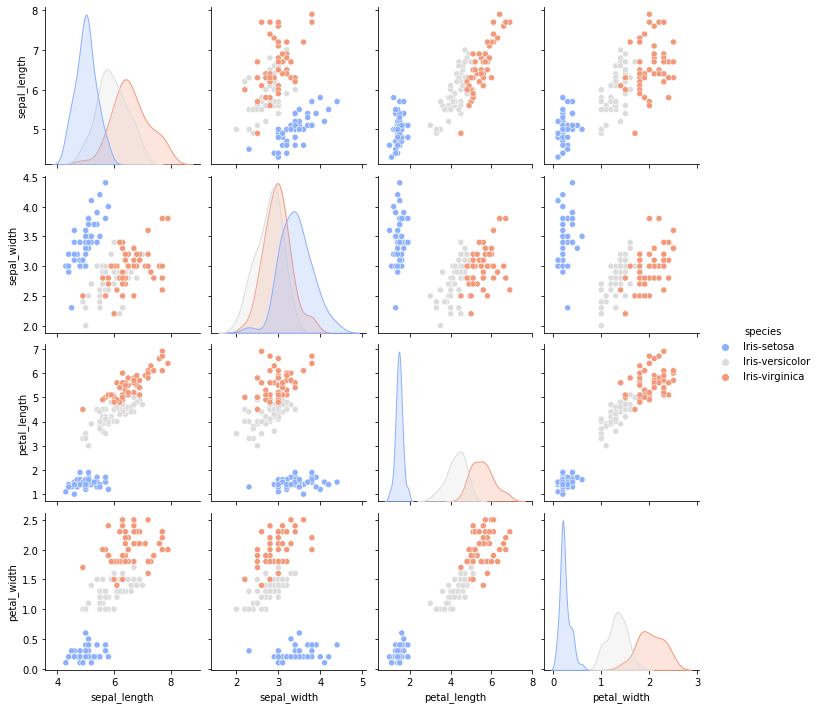

In [17]:
sns.pairplot(df,hue = "species",palette= "coolwarm")

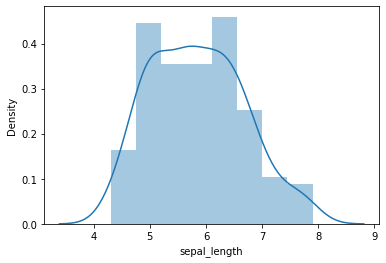

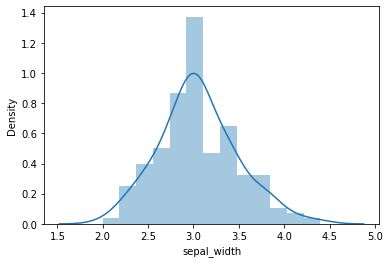

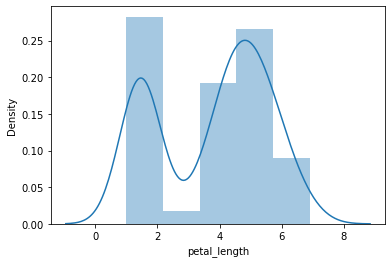

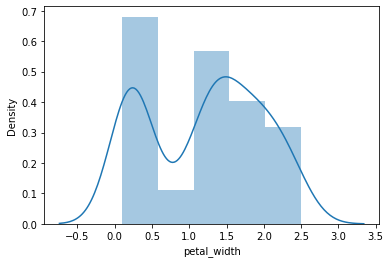

In [18]:
num=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
     

for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.distplot(df[col])


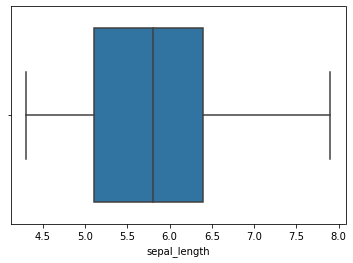

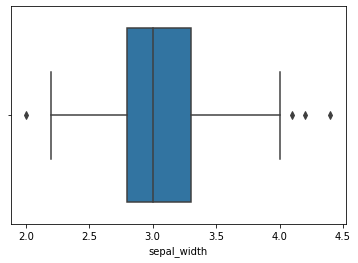

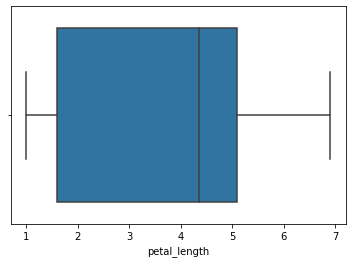

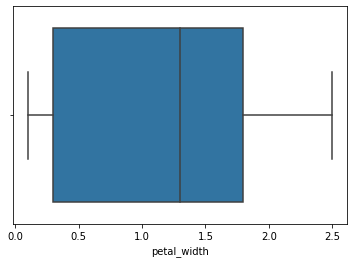

In [19]:
num=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
     

for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.boxplot(df[col])

Inference:
    
    i)Sepal length,petal length,petal width doesn't have any outliers
    
    ii)Sepal_width have some outliers

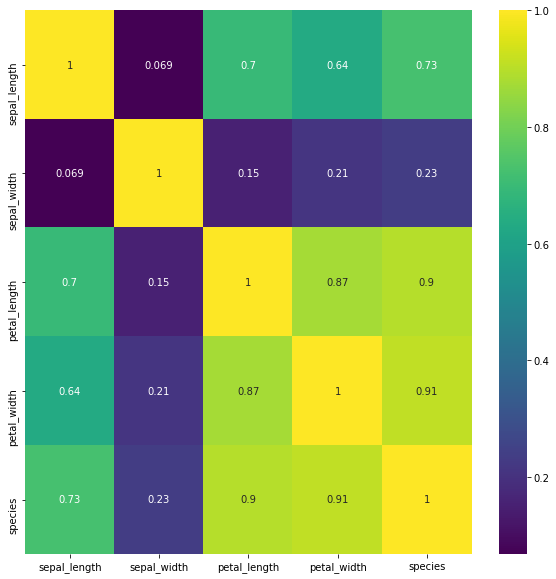

In [20]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1,)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='viridis')
plt.show()
     

From the above correlation plot for the given dataset for  prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

The strongly correlated items are : 1.Petal length and species. 2.Petal width and species. 3.sepal length and species.

The weekly correlated items are : 1.sepal width and species. 2.sepal length and sepal width

These are some relations which do not depend on each other at all.

## 3.Feature engineering

### skewness removal

In [21]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

There is not much skewness present in the data.

### Null Value removal

In [22]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


There is no null value present in the data.

### Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [24]:
df['species']=LE.fit_transform(df['species'])
     

In [25]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
 print(df['species'].value_counts())

0    50
1    50
2    50
Name: species, dtype: int64


## 4.TEST TRAIN SPLIT

In [27]:
x= df.drop(columns='species')
y= df['species']

In [28]:
x.shape
     

(150, 4)

In [29]:
y.shape
     

(150,)

In [30]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

#### Scaling using min max scaler

In [31]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [32]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

## 5.Model construction

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### a)RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
# creating the model
model_rfc=RandomForestClassifier(n_estimators=400)
# feeding the training set into the model
model_rfc.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_rfc.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_rfc.score(x_train,y_train))
print('testing accuracy :',model_rfc.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))


Training accuracy : 1.0
testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


#### cross validation score

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv=cross_val_score(model_rfc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',rfc_cv)


cv score : 0.9666666666666666


### b)SVC

In [36]:
from sklearn.svm import SVC
# creating the model
model_svc = SVC()
# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.975
Testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


### cross validation score

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(model_svc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',svc_cv)

cv score : 0.9733333333333334


### c)DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 1.0
Testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


#### cross validation score

In [39]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.925

### d)GaussianNB

In [40]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.95
Testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


#### cross validation score

In [41]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.9416666666666667

### e)KNeighborsClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.9666666666666667
Testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


#### cross validation score

In [43]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.9666666666666668

### e)LogisticRegression

In [44]:
# creating the model
model_lg=LogisticRegression()
# feeding the training set into the model
model_lg.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_lg.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_lg.score(x_train,y_train))
print('testing accuracy :',model_lg.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.9333333333333333
testing accuracy : 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
accuracy_score : 0.9666666666666667


#### cross validation score

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
print('cv score :',lg_cv)

cv score : 0.9733333333333333


In [46]:
print('MODEL',"             ",'Accurancy score','      ','C_V Score','     ','Difference')
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_dt.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"      ",round(knn_cv.mean(),2),"      ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"      ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3)) 

MODEL               Accurancy score        C_V Score       Difference
LOGISTIC REGG     0.9666666666666667        0.97        -0.007
RANDOM FOREST     0.9666666666666667        0.97       0.0
SVC               0.9666666666666667        0.97        -0.007
DTREE             0.9666666666666667        0.92       0.042
KNeighborsclass   0.9666666666666667        0.97        -0.0
GaussianNB        0.9666666666666667        0.94       0.025


The best model accoding to accuracy score- cross validation score is RandomForestClassifier,KNeighborsClassifier since it is having least difference

# 6.Hyper parameter tuning

### FINDING BEST random_state

In [47]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg=LogisticRegression(fit_intercept=True)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)

accurancy 0.9536585365853658 random_state 0
accurancy 0.9536585365853658 random_state 0
accurancy 0.9536585365853658 random_state 1
accurancy 0.9536585365853658 random_state 1
accurancy 0.962037962037962 random_state 2
accurancy 0.962037962037962 random_state 2
accurancy 0.9609053497942387 random_state 3
accurancy 0.962037962037962 random_state 3
accurancy 0.9655797101449275 random_state 4
accurancy 0.9655797101449275 random_state 4
accurancy 0.9583333333333334 random_state 5
accurancy 0.9655797101449275 random_state 5
accurancy 0.9227642276422764 random_state 6
accurancy 0.9655797101449275 random_state 6
accurancy 0.8325991189427313 random_state 7
accurancy 0.9655797101449275 random_state 7
accurancy 0.8846153846153846 random_state 8
accurancy 0.9655797101449275 random_state 8
accurancy 1.0 random_state 9
accurancy 1.0 random_state 9
accurancy 1.0 random_state 10
accurancy 1.0 random_state 10
accurancy 0.887905604719764 random_state 11
accurancy 1.0 random_state 11
accurancy 0.9609053

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=9)

### i)RandomForestClassifier

In [49]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [50]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [51]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [52]:
clf= RandomForestClassifier(criterion='gini',min_samples_split=2,n_estimators=50,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [53]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 4).mean()
randomforest_cv

0.9667496443812233

### ii)KNeighborsClassifier

In [54]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
knn_final=prediction
knn_finalmod=model1

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 1.0
Confusion Metrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]


In [55]:
knn_cv=cross_val_score(model1,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.9666666666666668

The best model is RandomForestClassifier() with 100% accuracy

# 7)Evaluation

### AUC ROC CURVE

In [56]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [57]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


model1 = RandomForestClassifier()


# fit model
model1.fit(x_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

In [58]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [59]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear").fit(x_train, y_train)
preds = clf.predict_proba(x_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print(roc_auc)



1.0


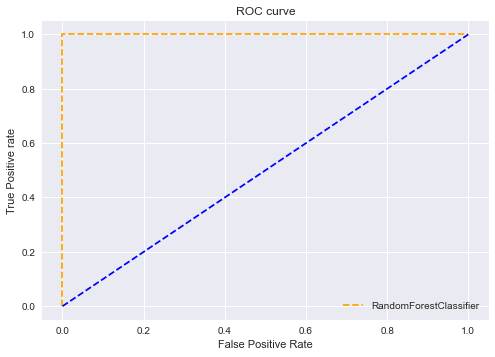

In [60]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The accuracy of the model is 100.0 %

### Test set prediction

In [61]:
finRFC= clf.predict([[6.7,3,5.2,2.3]]) # 0-Iris-setosa, 1-Iris-versicolor, 2-Iris-virginica

finRFC

array([2])

In [62]:
finRFC= clf.predict([[5,3.6,1.4,0.3]]) # 0-Iris-setosa, 1-Iris-versicolor, 2-Iris-virginica

finRFC

array([0])

In [63]:
finRFC= clf.predict([[6.7,3.1,4.4,1.4]]) # 0-Iris-setosa, 1-Iris-versicolor, 2-Iris-virginica

finRFC

array([1])

In [64]:
df.iloc[65]

sepal_length    6.7
sepal_width     3.1
petal_length    4.4
petal_width     1.4
species         1.0
Name: 65, dtype: float64

# 8.saving the model

In [65]:
import joblib
joblib.dump(clf,"final_model.pkl")

['final_model.pkl']